In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression


In [100]:
employer_data = pd.read_csv('diligence_initech.fake_initech_employer_data.csv', parse_dates=['month'])
# twenty_18 = employer_data[employer_data['month'].str.contains("18", na=False)]
employer_data

,month,employer_id,market,revenue,revenue_minus_direct_costs
0,2015-01-01,9chMy7swbDZ3sqaDCqLlLUQDsMY=,sf-bay-area,0.0,0.000000
1,2015-01-01,3laXJ20VXJNgfEa0zEbBnjD3Cos=,sf-bay-area,250.0,50.000000
2,2015-01-01,nHCU9OfsFRequzQshFD1qypEJVc=,sf-bay-area,250.0,0.000000
3,2015-01-01,khcezEHqw5MZCSE5QdioEP08ZaI=,other,0.0,0.000000
4,2015-02-01,ldW+l2PmzbyDN38Q2cKswMNO6k0=,sf-bay-area,0.0,0.000000
...,...,...,...,...,...
20632,2019-06-01,KC85QAzzUqt9y9ITLcFaB6dC3Ik=,new-york-city,0.0,0.000000
20633,2019-06-01,ptpvuPAG7OhOO0EviZbixX+5An4=,los-angeles,1150.5,230.100000
20634,2019-06-01,4C67rtvvKRW/9wUZUQ0CtRXRx0Q=,new-york-city,0.0,0.000000
20635,2019-06-01,NsHaIczTmeStIgw5E0TfDe96RjE=,washington-dc,202.5,52.500008


In [101]:
grouped_data = employer_data.groupby('month').sum()
grouped_data['log_revenue'] = np.log(grouped_data['revenue'])

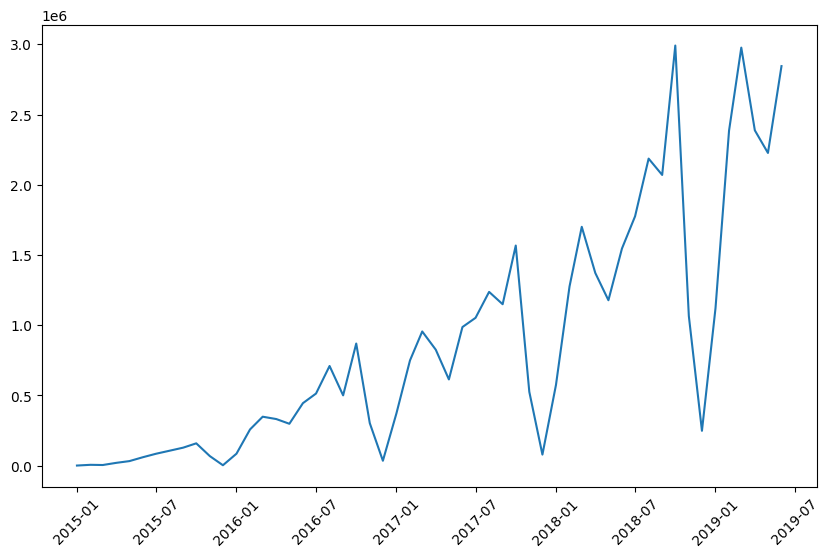

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['revenue'])
plt.xticks(rotation=45);

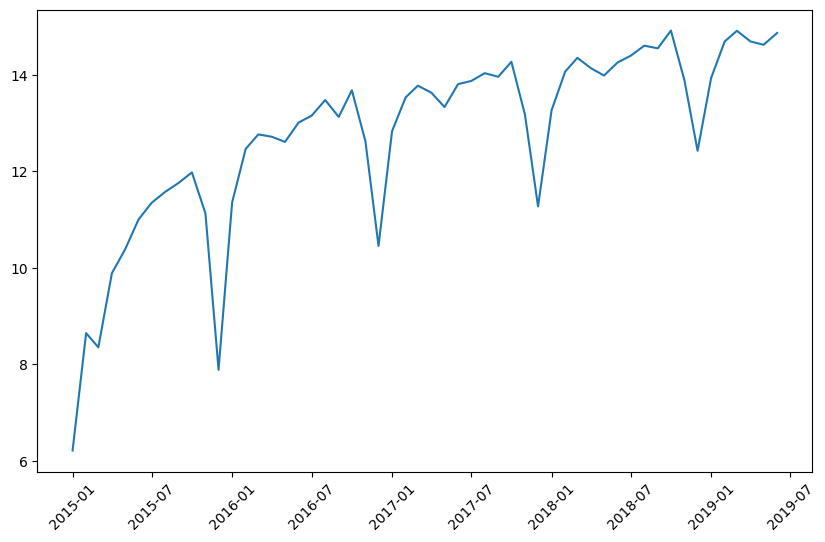

In [103]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['log_revenue'])
plt.xticks(rotation=45);

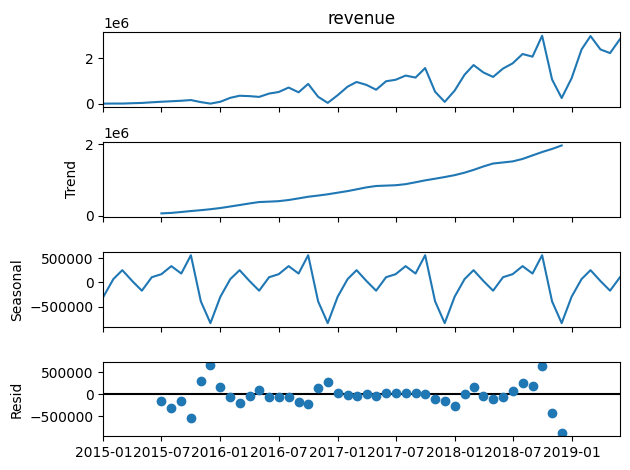

In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Replace 'column_name' with the actual column name of your time series data
result = seasonal_decompose(grouped_data['revenue'], model='additive', period=12)

# Plot the components
result.plot()
plt.show()

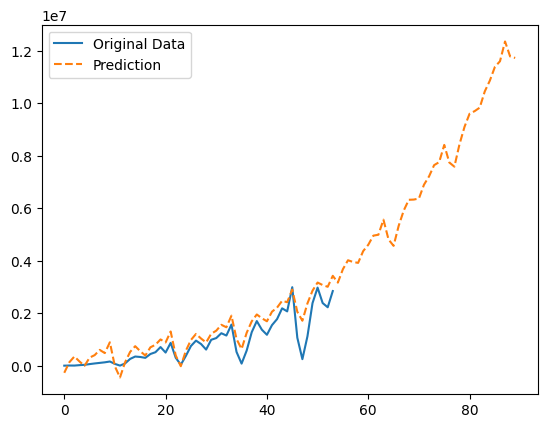

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

trend = result.trend.dropna().values
time_trend = np.arange(len(trend))

# Design matrix for polynomial regression (e.g., for a 3rd degree polynomial)
degree = 3
X = np.column_stack([time_trend**i for i in range(degree + 1)])

# Least squares solution for the coefficients
coefficients = np.linalg.lstsq(X, trend, rcond=None)[0]

# Predict the future trend using the polynomial model
future_time = np.arange(len(grouped_data['revenue']) + 100)
future_trend = sum(coefficients[i] * future_time**i for i in range(degree + 1))

# Step 3: Model the Seasonal Component
seasonal = result.seasonal
future_seasonal = np.tile(seasonal, len(future_time)//len(seasonal) + 1)[:len(future_time)]

# Step 4: Combine the Trend and Seasonal Component
prediction = future_trend + future_seasonal

# Step 5: Plot the Original Data and Prediction
plt.plot(np.arange(len(grouped_data['revenue'])), grouped_data['revenue'], label='Original Data')
plt.plot(future_time[:90], prediction[:90], label='Prediction', linestyle='dashed')
plt.legend()
plt.show()

## Arima Modeling

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot

In [153]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

In [131]:
arima = employer_data.groupby('month').sum()
arima.head()

,employer_id,market,revenue,revenue_minus_direct_costs
month,,,,
2015-01-01,9chMy7swbDZ3sqaDCqLlLUQDsMY=3laXJ20VXJNgfEa0zE...,sf-bay-areasf-bay-areasf-bay-areaother,500.00,50.0000
2015-02-01,ldW+l2PmzbyDN38Q2cKswMNO6k0=6b8e086+uF3yjICwYm...,sf-bay-areasf-bay-areasf-bay-areasf-bay-areasf...,5687.50,87.5000
2015-03-01,ldW+l2PmzbyDN38Q2cKswMNO6k0=6b8e086+uF3yjICwYm...,sf-bay-areasf-bay-areasf-bay-areasf-bay-areasf...,4238.50,136.7000
2015-04-01,ldW+l2PmzbyDN38Q2cKswMNO6k0=6b8e086+uF3yjICwYm...,sf-bay-areasf-bay-areasf-bay-areasf-bay-areasf...,19691.88,2266.2855
2015-05-01,ldW+l2PmzbyDN38Q2cKswMNO6k0=6b8e086+uF3yjICwYm...,sf-bay-areasf-bay-areasf-bay-areasf-bay-areasf...,32081.66,4112.1240


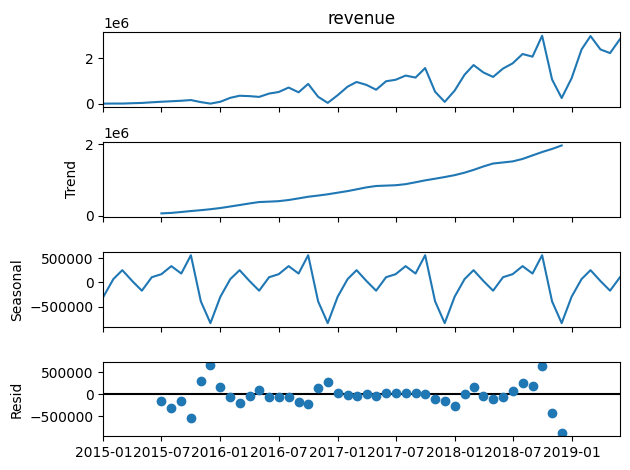

In [137]:
result = seasonal_decompose(arima['revenue'], model='additive', period=12)
result.plot()
plt.show()